**Input:** df_master, df_provider </br>
**Output:** df_master_preprocessed, df_provider_preprocessed

In [1]:
from utilities import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_master = pd.read_csv('/drives/drive1/Patient Safety Graphs/data_release_12132022/Master_20221128.csv', sep=',', encoding="ISO-8859-1")

In [5]:
df_provider1 = pd.read_csv('/drives/drive1/Patient Safety Graphs/data_release_12132022/Provider1_20221128.csv', sep=',', encoding="utf-8")
df_provider2 = pd.read_csv('/drives/drive1/Patient Safety Graphs/data_release_12132022/Provider2_20221128.csv', sep=',', encoding="utf-8")
df_provider3 = pd.read_csv('/drives/drive1/Patient Safety Graphs/data_release_12132022/Provider3_20221128.csv', sep=',', encoding="utf-8")
df_provider4 = pd.read_csv('/drives/drive1/Patient Safety Graphs/data_release_12132022/Provider4_20221128.csv', sep=',', encoding="utf-8")
df_provider5 = pd.read_csv('/drives/drive1/Patient Safety Graphs/data_release_12132022/Provider5_20221128.csv', sep=',', encoding="utf-8")
df_provider6 = pd.read_csv('/drives/drive1/Patient Safety Graphs/data_release_12132022/Provider6_20221128.csv', sep=',', encoding="utf-8")
df_provider7 = pd.read_csv('/drives/drive1/Patient Safety Graphs/data_release_12132022/Provider7_20221128.csv', sep=',', encoding="utf-8")
df_provider8 = pd.read_csv('/drives/drive1/Patient Safety Graphs/data_release_12132022/Provider8_20221128.csv', sep=',', encoding="utf-8")


df_provider = pd.concat([df_provider1,df_provider2,df_provider3,df_provider4,df_provider5,df_provider6,df_provider7,df_provider8])


print("complete read")

complete read


In [6]:
df_provider['CASE_NUMBER'] = df_provider['ENCRYPTED_CASE_NUMBER'] + df_provider['CASE_DATE']
df_master['CASE_NUMBER'] = df_master['ENCRYPTED_CASE_NUMBER'] + df_master['Case Date']

In [7]:
df_provider.drop(columns=['ENCRYPTED_CASE_NUMBER'],inplace=True)
df_master.drop(columns=['ENCRYPTED_CASE_NUMBER'] ,inplace=True)

In [8]:
print(len(list(df_master['CASE_NUMBER'])))
print(len(set(df_master['CASE_NUMBER'])))
print(len(list(df_master['ENCRYPTED_HOSP_ENCOUNTER'])))
print(len(set(df_master['ENCRYPTED_HOSP_ENCOUNTER'])))
print(len(list(df_master['ENCRYPTED_MRN'])))
print(len(set(df_master['ENCRYPTED_MRN'])))

469365
469365
469365
441421
469365
223535


In [9]:
#inpatient_ind = df_master['Patient Type']=='INPATIENT'
df_master = df_master.loc[df_master['Patient Type']=='INPATIENT']

In [10]:
print(len(list(df_master['CASE_NUMBER'])))
print(len(set(df_master['CASE_NUMBER'])))
print(len(list(df_master['ENCRYPTED_HOSP_ENCOUNTER'])))
print(len(set(df_master['ENCRYPTED_HOSP_ENCOUNTER'])))
print(len(list(df_master['ENCRYPTED_MRN'])))
print(len(set(df_master['ENCRYPTED_MRN'])))

205428
205428
205428
177690
205428
115827


In [11]:
print(len(df_provider))
print(len(set(df_provider['CASE_NUMBER'])))
df_provider = df_provider.loc[df_provider['ENCRYPTED_PROVIDER_NAME'] != "MISSING OR INVALID DATA FORMATION",:]
print(len(df_provider))
print(len(set(df_provider['CASE_NUMBER'])))

3878821
419033
3701101
419033


In [12]:
df_master = df_master.loc[(df_master['LOS'].notnull())&
                          (df_master['CASE_NUMBER'].isin(df_provider["CASE_NUMBER"])) & 
                          (~df_master['Case Date'].isna()) &
                          (~df_master['Admit DateTime'].isna()),:]

In [13]:
print(len(list(df_master['CASE_NUMBER'])))
print(len(set(df_master['CASE_NUMBER'])))
print(len(list(df_master['ENCRYPTED_HOSP_ENCOUNTER'])))
print(len(set(df_master['ENCRYPTED_HOSP_ENCOUNTER'])))
print(len(list(df_master['ENCRYPTED_MRN'])))
print(len(set(df_master['ENCRYPTED_MRN'])))

161748
161748
161748
137219
161748
103099


In [14]:
case_id_array = df_master["CASE_NUMBER"].values

In [15]:
df_provider = df_provider.loc[df_provider["CASE_NUMBER"].isin(case_id_array),:]
print(len(df_provider))
print(len(set(df_provider['CASE_NUMBER'])))

1735359
161748


In [16]:
#na in LOS
print(pd.isna(df_master['LOS']).mean())
print(np.mean(df_provider["CASE_NUMBER"].drop_duplicates().isin(case_id_array)))
print(df_master.shape)
#include only those with provider information
print(len(set(df_master["CASE_NUMBER"])))
print(df_master['Patient Type'].value_counts())

0.0
1.0
(161748, 69)
161748
INPATIENT    161748
Name: Patient Type, dtype: int64


*moratality*

In [17]:
df_master['Dischg Date'] = pd.to_datetime(df_master['Dischg Date'])
df_master['Death Date'] = pd.to_datetime(df_master['Death Date'])
df_master['SSDI Death Date'] = pd.to_datetime(df_master['SSDI Death Date'])

In [18]:
print("Encoutner without Discharge date(%):",np.round(np.mean(df_master['Dischg Date'].isna())*100,2))
print("Encoutner without Death Date, i.e. alive(%):",np.round(np.mean(df_master['Death Date'].isna())*100,2))
print("Encoutner without SSDI Death Date, i.e. alive(%):",np.round(np.mean(df_master['SSDI Death Date'].isna())*100,2))

df_master['death_date_final'] = np.where(df_master['Death Date'].isna(),df_master['SSDI Death Date'],df_master['Death Date'])
print("Encoutner without death_date_final, i.e. alive(%):",np.round(np.mean(df_master['death_date_final'].isna())*100,2))

df_master['IF_died'] = (~df_master['death_date_final'].isna())*1
df_master['IF_died_prior_dischg'] = (df_master['death_date_final'] <= df_master['Dischg Date'])*1

Encoutner without Discharge date(%): 0.13
Encoutner without Death Date, i.e. alive(%): 81.18
Encoutner without SSDI Death Date, i.e. alive(%): 97.09
Encoutner without death_date_final, i.e. alive(%): 80.07


In [19]:
df_master['Room End Datetime'] = pd.to_datetime(df_master['Room End Datetime'])

In [20]:
room_end_time = df_master.groupby(['ENCRYPTED_MRN','ENCRYPTED_HOSP_ENCOUNTER']).agg(Surgery_End_Datetime = ('Room End Datetime','max')).reset_index()

In [21]:
print(df_master.shape)
df_master = pd.merge(df_master,room_end_time,on=['ENCRYPTED_MRN','ENCRYPTED_HOSP_ENCOUNTER'],how='left')
print(df_master.shape)
print(len(list(df_master['CASE_NUMBER'])))
print(len(set(df_master['CASE_NUMBER'])))
print(len(list(df_master['ENCRYPTED_HOSP_ENCOUNTER'])))
print(len(set(df_master['ENCRYPTED_HOSP_ENCOUNTER'])))
print(len(list(df_master['ENCRYPTED_MRN'])))
print(len(set(df_master['ENCRYPTED_MRN'])))

(161748, 72)
(161748, 73)
161748
161748
161748
137219
161748
103099


In [22]:
df_master = df_master.loc[~(df_master['Surgery_End_Datetime'].isna())].reset_index(drop=True)
print(len(list(df_master['CASE_NUMBER'])))
print(len(set(df_master['CASE_NUMBER'])))
print(len(list(df_master['ENCRYPTED_HOSP_ENCOUNTER'])))
print(len(set(df_master['ENCRYPTED_HOSP_ENCOUNTER'])))
print(len(list(df_master['ENCRYPTED_MRN'])))
print(len(set(df_master['ENCRYPTED_MRN'])))

161169
161169
161169
136647
161169
102768


In [23]:
df_master['Death_surgery_span30d'] = df_master['Surgery_End_Datetime'] + pd.DateOffset(days=30)
df_master['Death_surgery_span90d'] = df_master['Surgery_End_Datetime'] + pd.DateOffset(days=90)
print("Encoutner with missing Room end time(%):",np.round(np.mean(df_master['Room End Datetime'].isna())*100,2))
print("Encoutner without Surgery_End_Datetime(%):",np.round(np.mean(df_master['Surgery_End_Datetime'].isna())*100,2))
df_master['IF_died_postsurg30d'] = (df_master['death_date_final'] <= df_master['Death_surgery_span30d'])*1
df_master['IF_died_postsurg90d'] = (df_master['death_date_final'] <= df_master['Death_surgery_span90d'])*1
print("Encoutner died(%):",np.round(np.mean(df_master['IF_died'])*100,2))
print("Encoutner died prior to discharge(%):",np.round(np.mean(df_master['IF_died_prior_dischg'])*100,2))
print("Encoutner died within 30 days after surgery ended:",np.round(np.mean(df_master['IF_died_postsurg30d'])*100,2))
print("Encoutner died within 90 days after surgery ended:",np.round(np.mean(df_master['IF_died_postsurg90d'])*100,2))

Encoutner with missing Room end time(%): 0.2
Encoutner without Surgery_End_Datetime(%): 0.0
Encoutner died(%): 19.92
Encoutner died prior to discharge(%): 2.9
Encoutner died within 30 days after surgery ended: 4.17
Encoutner died within 90 days after surgery ended: 6.59


*provider type*

In [24]:
unique_providers = df_provider[['ENCRYPTED_PROVIDER_NAME','PROVIDER_TYPE']].drop_duplicates()
unique_providers_last = unique_providers.groupby('ENCRYPTED_PROVIDER_NAME').last().reset_index()

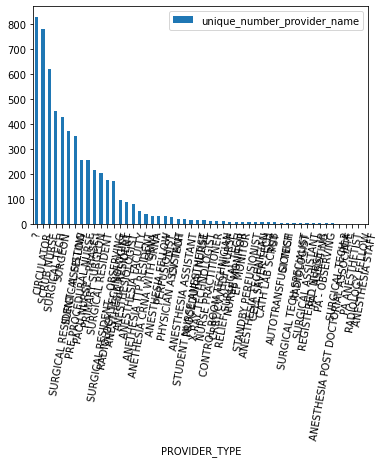

In [25]:
plt.rcParams["figure.figsize"] = (20,5)
ax=unique_providers_last.groupby('PROVIDER_TYPE').count().reset_index().sort_values('ENCRYPTED_PROVIDER_NAME',ascending=False).rename(columns={'ENCRYPTED_PROVIDER_NAME':'unique_number_provider_name'}).plot.bar(x='PROVIDER_TYPE',y='unique_number_provider_name',rot=80)
plt.show()

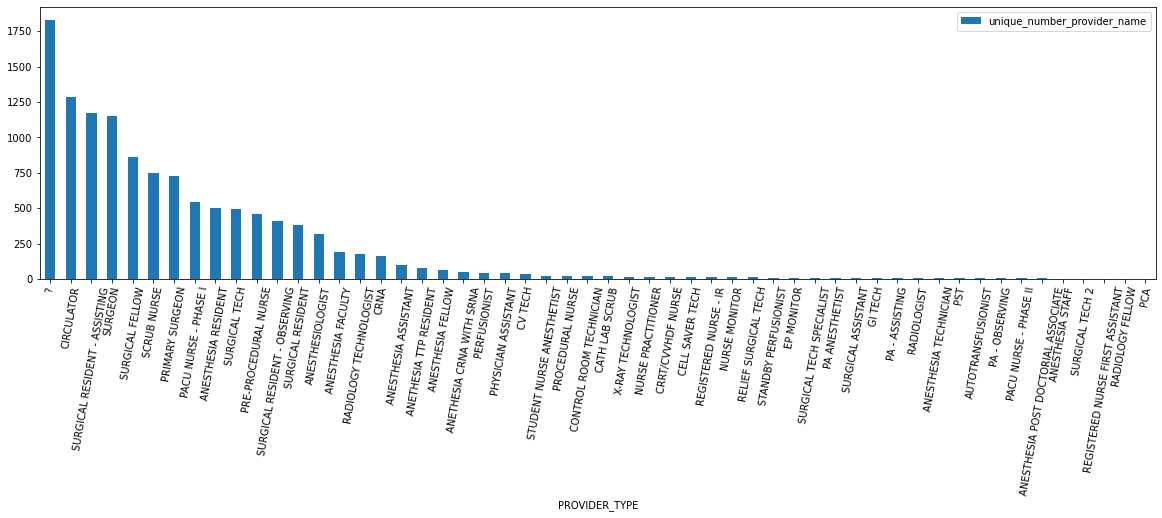

In [26]:
plt.rcParams["figure.figsize"] = (20,5)
ax=unique_providers.groupby('PROVIDER_TYPE').count().reset_index().sort_values('ENCRYPTED_PROVIDER_NAME',ascending=False).rename(columns={'ENCRYPTED_PROVIDER_NAME':'unique_number_provider_name'}).plot.bar(x='PROVIDER_TYPE',y='unique_number_provider_name',rot=80)
plt.show()


In [27]:
provider_type_map = pd.read_csv('/drives/drive1/home/changyu_yin/Desktop/PSG/Provider_Mapping.csv')

In [28]:
np.sum(df_provider['PROVIDER_TYPE'].isna())

651

In [29]:
df_provider.PROVIDER_TYPE= df_provider.PROVIDER_TYPE.fillna('?')

In [30]:
np.sum(df_provider['PROVIDER_TYPE'].isna())

0

In [31]:
df_provider = pd.merge(df_provider,provider_type_map,how='left',on='PROVIDER_TYPE')

In [32]:
df_provider.loc[df_provider['PROVIDER_TYPE_GROUP'].isna()]['PROVIDER_TYPE'].value_counts()
np.sum(df_provider['PROVIDER_TYPE'].isna()),np.sum(df_provider['PROVIDER_TYPE_GROUP'].isna())

(0, 0)

In [33]:
df_provider.drop(columns='PROVIDER_TYPE',inplace=True)
df_provider.columns

Index(['CASE_DATE', 'ENCRYPTED_PROVIDER_NAME', 'BEGIN_Datetime',
       'END_Datetime', 'CASE_NUMBER', 'PROVIDER_TYPE_GROUP'],
      dtype='object')

In [34]:
df_provider.columns = ['CASE_DATE', 'ENCRYPTED_PROVIDER_NAME',
       'BEGIN_Datetime', 'END_Datetime','CASE_NUMBER','PROVIDER_TYPE']

In [35]:
unique_providers = df_provider[['ENCRYPTED_PROVIDER_NAME','PROVIDER_TYPE']].drop_duplicates()
unique_providers_last = unique_providers.groupby('ENCRYPTED_PROVIDER_NAME').last().reset_index()

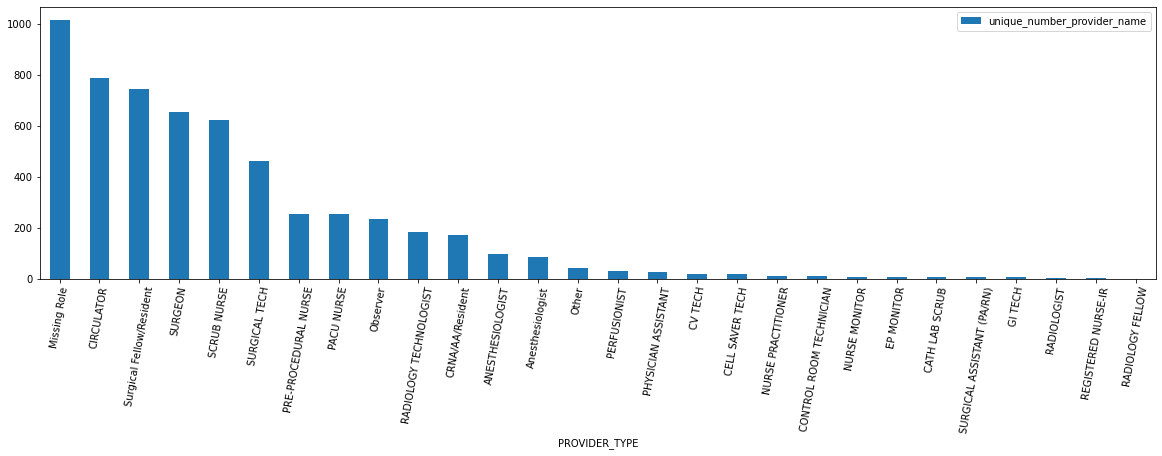

In [36]:
plt.rcParams["figure.figsize"] = (20,5)
ax=unique_providers_last.groupby('PROVIDER_TYPE').count().reset_index().sort_values('ENCRYPTED_PROVIDER_NAME',ascending=False).rename(columns={'ENCRYPTED_PROVIDER_NAME':'unique_number_provider_name'}).plot.bar(x='PROVIDER_TYPE',y='unique_number_provider_name',rot=80)
plt.show()

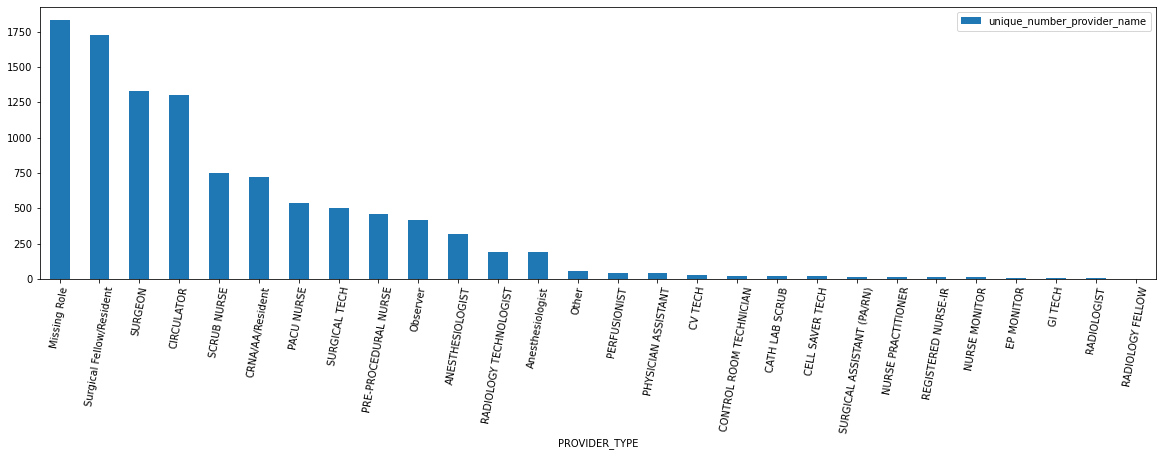

In [37]:
plt.rcParams["figure.figsize"] = (20,5)
ax=unique_providers.groupby('PROVIDER_TYPE').count().reset_index().sort_values('ENCRYPTED_PROVIDER_NAME',ascending=False).rename(columns={'ENCRYPTED_PROVIDER_NAME':'unique_number_provider_name'}).plot.bar(x='PROVIDER_TYPE',y='unique_number_provider_name',rot=80)
plt.show()

In [38]:
unique_providers = df_provider[['CASE_NUMBER','ENCRYPTED_PROVIDER_NAME','PROVIDER_TYPE']].groupby(['ENCRYPTED_PROVIDER_NAME','PROVIDER_TYPE']).nunique('CASE_NUMBER').reset_index()

In [39]:
unique_providers = unique_providers.sort_values('CASE_NUMBER',ascending=False).groupby(['ENCRYPTED_PROVIDER_NAME']).head(1)

In [40]:
unique_providers = unique_providers.reset_index(drop=True).drop(columns='CASE_NUMBER')

In [41]:
len(set(unique_providers['ENCRYPTED_PROVIDER_NAME']))

5788

In [42]:
df_provider = df_provider.drop(columns='PROVIDER_TYPE')
df_provider = pd.merge(df_provider,unique_providers,on='ENCRYPTED_PROVIDER_NAME',how='left')

In [43]:
df_provider.shape

(1735359, 6)

In [44]:
unique_providers = df_provider[['ENCRYPTED_PROVIDER_NAME','PROVIDER_TYPE']].drop_duplicates()
unique_providers_last = unique_providers.groupby('ENCRYPTED_PROVIDER_NAME').last().reset_index()

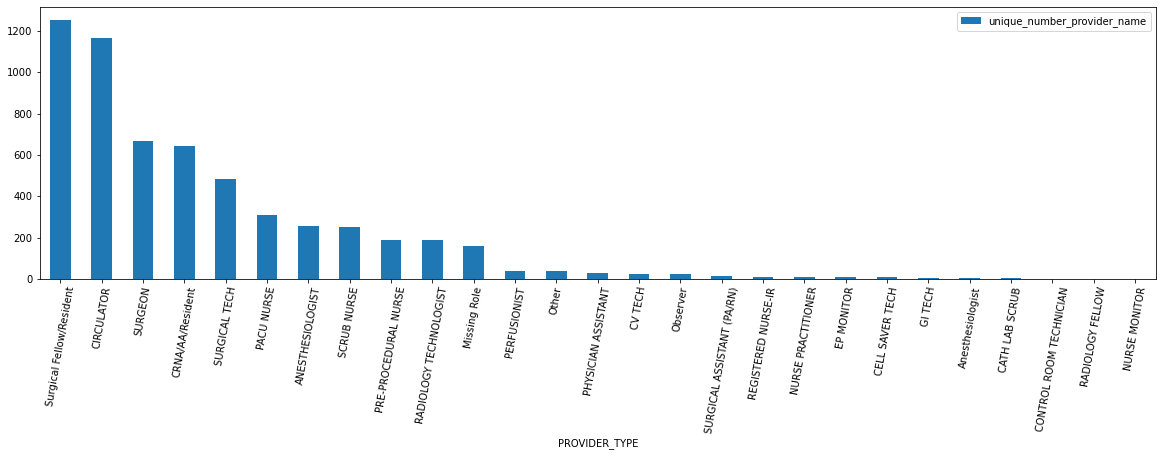

In [45]:
plt.rcParams["figure.figsize"] = (20,5)
ax=unique_providers_last.groupby('PROVIDER_TYPE').count().reset_index().sort_values('ENCRYPTED_PROVIDER_NAME',ascending=False).rename(columns={'ENCRYPTED_PROVIDER_NAME':'unique_number_provider_name'}).plot.bar(x='PROVIDER_TYPE',y='unique_number_provider_name',rot=80)
plt.show()

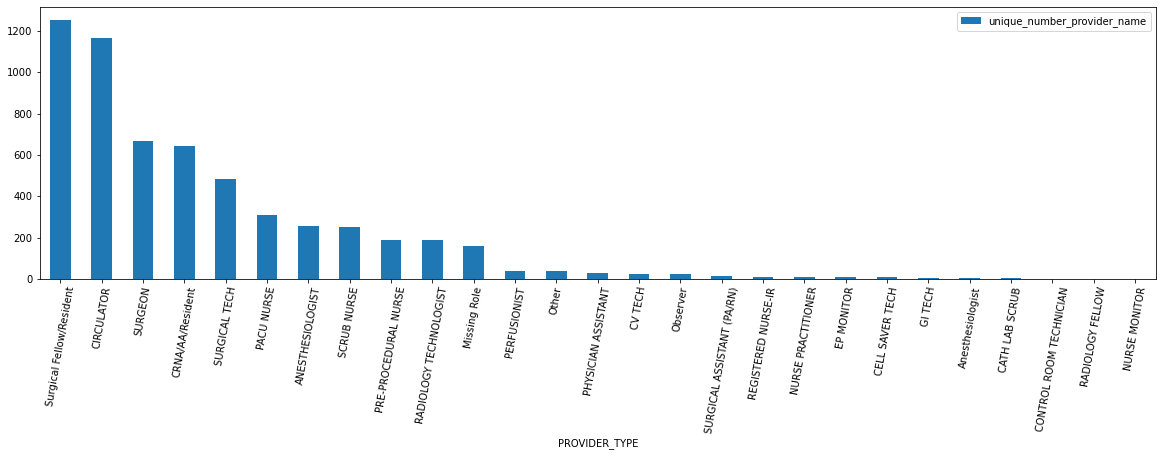

In [46]:
plt.rcParams["figure.figsize"] = (20,5)
ax=unique_providers.groupby('PROVIDER_TYPE').count().reset_index().sort_values('ENCRYPTED_PROVIDER_NAME',ascending=False).rename(columns={'ENCRYPTED_PROVIDER_NAME':'unique_number_provider_name'}).plot.bar(x='PROVIDER_TYPE',y='unique_number_provider_name',rot=80)
plt.show()

*write*

In [47]:
pickle.dump(df_master,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/df_master_preprocessed.pkl','wb'))
pickle.dump(df_provider,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/df_provider_preprocessed.pkl','wb'))